In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

## Load data

In [2]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

In [3]:
# 7000 data with 300 features
print(x_train.shape)

(7000, 300)


In [4]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


## Question 1
K-fold data partition: Implement the K-fold cross-validation function. Your function should take K as an argument and return a list of lists (len(list) should equal to K), which contains K elements. Each element is a list contains two parts, the first part contains the index of all training folds, e.g. Fold 2 to Fold 5 in split 1. The second part contains the index of validation fold, e.g. Fold 1 in  split 1

In [5]:
def cross_validation(x_train, y_train, k=5):
    kflod_data = []
    num_data = len(x_train)
    index = np.random.permutation(np.arange(num_data))
    num = num_data // k
    first_num = num_data % k
    second_num = k - first_num
    num_list = []
    for i in range(first_num):
        num_list.append(num + 1)
    for i in range(second_num):
        num_list.append(num)
    sum = 0
    for n in num_list:
        train_index = np.sort(np.concatenate((index[:sum],index[sum + n:]),axis=0))
        valid_index = np.sort(index[sum:sum + n])
        kflod_data.append([train_index, valid_index])
        sum += n
    return kflod_data

In [6]:
kfold_data = cross_validation(x_train, y_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 700 # The number of data in each validation fold should equal to training data divieded by K

## example

In [7]:
from sklearn.model_selection import KFold

X = np.arange(20)
kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 0  1  2  4  5  6  7  9 10 11 12 13 15 17 18 19], Validation index: [ 3  8 14 16]
Split: 2, Training index: [ 0  3  4  5  6  7  8 11 12 13 14 15 16 17 18 19], Validation index: [ 1  2  9 10]
Split: 3, Training index: [ 0  1  2  3  5  6  7  8  9 10 12 13 14 16 18 19], Validation index: [ 4 11 15 17]
Split: 4, Training index: [ 0  1  2  3  4  5  6  8  9 10 11 12 14 15 16 17], Validation index: [ 7 13 18 19]
Split: 5, Training index: [ 1  2  3  4  7  8  9 10 11 13 14 15 16 17 18 19], Validation index: [ 0  5  6 12]


In [8]:
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

## Question 2
Using sklearn.svm.SVC to train a classifier on the provided train set and conduct the grid search of “C” and “gamma” to find the best parameters by cross-validation.

In [9]:
C_set = [np.power(10.0, p) for p in range(-1, 7)]
gamma_set = [np.power(10.0, p) for p in range(-8, -2)]
clf_set = [SVC(C=C, kernel='rbf', gamma=gamma) for C in C_set for gamma in gamma_set]

In [10]:
## your code
kflod_data = cross_validation(x_train, y_train, 7)
avg_scores = []
for clf in clf_set:
    scores = []
    for train_index, valid_index in kflod_data:
        clf.fit(x_train[train_index], y_train[train_index])
        y_pred = clf.predict(x_train[valid_index])
        scores.append(accuracy_score(y_pred, y_train[valid_index]))
    avg_scores.append(np.mean(scores))

In [14]:
best_index = np.argmax(avg_scores)
best_model = clf_set[best_index]
best_parameters = [C_set[best_index // len(gamma_set)], gamma_set[best_index % len(gamma_set)]]
print("[C, gamma]")
print(best_parameters)
print(best_model)

[C, gamma]
[10.0, 0.0001]
SVC(C=10.0, gamma=0.0001)


## Question 3
Plot the grid search results of your SVM. The x, y represents the hyperparameters of “gamma” and “C”, respectively. And the color represents the average score of validation folds
You reults should be look like this reference image below ![image](https://miro.medium.com/max/1296/1*wGWTup9r4cVytB5MOnsjdQ.png) 

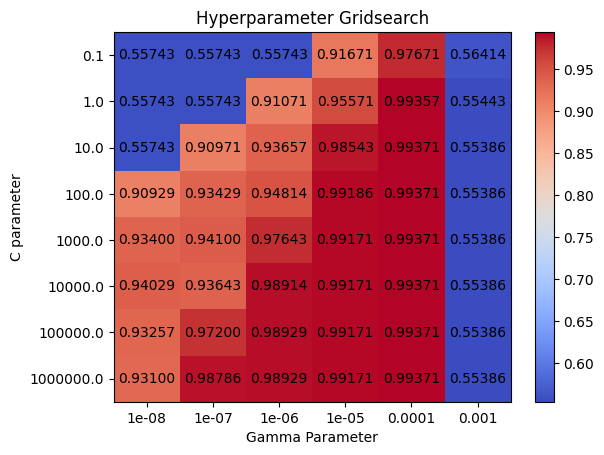

In [12]:
import matplotlib.pyplot as plt
X = C_set
Y = gamma_set
x = len(X)
y = len(Y)
scores_matrix = np.reshape(avg_scores, (x, y))
plt.imshow(scores_matrix, interpolation='nearest', aspect='auto', cmap=plt.cm.coolwarm)
plt.xlabel('Gamma Parameter')
plt.ylabel('C parameter')
plt.colorbar()
plt.xticks(np.arange(y), Y)
plt.yticks(np.arange(x), X)
plt.title('Hyperparameter Gridsearch')
for i in range(y):
    for j in range(x):
        plt.text(i, j, '%.5f' % scores_matrix[j][i], ha='center', va='center', color='black')

## Question 4
Train your SVM model by the best parameters you found from question 2 on the whole training set and evaluate the performance on the test set.

In [13]:
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print("Accuracy score: ", accuracy_score(y_pred, y_test))

SVC(C=10.0, gamma=0.0001)